# Exploratory Data Analysis 
EDA + feature engineering + also some more cleaning (outlier removal mostly)

### Setup

In [1]:
# CORE
import pandas as pd
import numpy as np  # Numpy for numerical computations and array operations
import pandas as pd  # Pandas for data manipulation and analysis

# MACHINE LEARNING & STATISTICS 
import scipy.stats as stats  # SciPy for scientific computing and technical computing, including statistics
import sklearn as sk # Scikit-learn for machine learning and predictive modeling

# VISUALIZATION
import matplotlib.pyplot as plt  # Matplotlib for creating static, animated, and interactive visualizations
import seaborn as sns  # Seaborn for statistical data visualization built on top of Matplotlib
import plotly.express as px  # Plotly Express for creating interactive plots and charts
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns

In [6]:
# import the cleaned data that was output by cleaning.ipynb
df = pd.read_csv('../CEIP_csv/ml_data.csv')
df_orginal = df.copy()
df.head()

,Unnamed: 0,dExtArea,dSheetArea,dLgExtConContainedDist,dExtBoundaryDist,dSheetWidth,dLgExtConArea,dExtContainedDist,dLgIntBoundaryDist,dSheetLength,fExtShape,dLgIntArea,dPartTrueArea,dLgExtConBoundaryDist,dLgIntContainedDist,calcUtil
0,0,151.1253,38808.0,0.0,4.7891,99.0,0.0,15.8795,0.0,392.0,0,0.0,151.1253,0.0,0.0,91.338529
1,1,49.5807,38808.0,0.0,3.1157,99.0,0.0,9.9701,0.0,392.0,0,0.0,49.5807,0.0,0.0,91.338529
2,2,222.0186,38808.0,0.0,4.7891,99.0,0.0,24.3234,0.0,392.0,0,0.0,222.0186,0.0,0.0,91.338529
3,3,2.5008,38808.0,0.0,0.6184,99.0,0.0,2.7209,0.0,392.0,0,0.0,2.5008,0.0,0.0,91.338529
4,4,11.5773,38808.0,0.0,0.9060,99.0,0.0,5.9537,0.0,392.0,0,0.0,11.5773,0.0,0.0,91.338529


In [11]:
# import the cleaned data that was output by cleaning.ipynb
df = pd.read_csv('../CEIP_csv/training_data.csv')
df_original = df.copy()
df.head()

,ixJobSummary,ixNest,ixPart,dPartTrueArea,cRequired,cNested,ixMaterial,fExtShape,dExtArea,dExtBoundaryDist,...,fStrategies,dSheetLength,dSheetWidth,dSheetArea,dLengthUsed,dWidthUsed,dPartArea,calcUtil,ixAutoNestStrategy,fAllPartsNested
0,304409,746165,2377314,151.1253,5,5,3,0,151.1253,4.7891,...,0,392.0,99.0,38808.0,390.1389,98.9965,35446.6563,91.338529,5,0
1,304409,746165,2377315,49.5807,10,10,3,0,49.5807,3.1157,...,0,392.0,99.0,38808.0,390.1389,98.9965,35446.6563,91.338529,5,0
2,304409,746165,2377315,49.5807,10,10,3,0,49.5807,3.1157,...,0,392.0,99.0,38808.0,390.1389,98.9965,35446.6563,91.338529,5,0
3,304409,746165,2377316,222.0186,5,5,3,0,222.0186,4.7891,...,0,392.0,99.0,38808.0,390.1389,98.9965,35446.6563,91.338529,5,0
4,304409,746165,2377316,222.0186,5,5,3,0,222.0186,4.7891,...,0,392.0,99.0,38808.0,390.1389,98.9965,35446.6563,91.338529,5,0


In [7]:
# find the summary statistics for the calcUtil column
df['calcUtil'].describe()

count     4.014410e+06
mean    -4.143076e+285
std                inf
min     -2.079001e+291
25%       5.230078e+01
50%       7.406721e+01
75%       8.412582e+01
max      4.112029e+156
Name: calcUtil, dtype: float64

/Users/jerhadf/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jerhadf/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='calcUtil'>

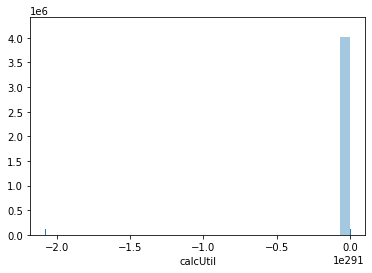

In [10]:
# plot a histogram of the calcUtil column 
sns.distplot(df['calcUtil'], bins=30, kde=False, rug=True)

In [9]:
# remove outliers and NaNs in the calcUtil column and then calculate the standard deviation 
# and mean of the calcUtil column
df['calcUtil'] = df['calcUtil'].replace([np.inf, -np.inf], np.nan)
df['calcUtil'] = df['calcUtil'].replace(0, np.nan)
# drop the N/A values 
df = df.dropna(subset=['calcUtil'])
df['calcUtil'].describe()

count     4.014410e+06
mean    -4.144038e+285
std                inf
min     -2.079001e+291
25%       5.230078e+01
50%       7.406721e+01
75%       8.412582e+01
max      4.112029e+156
Name: calcUtil, dtype: float64

## Feature Engineering

### Feature selection

In [1]:
# list the columns in the dataframe
column_list = df.columns.tolist()

# list of index columns (like ixNest, ixJobSummary, ixPart)
indices = [column for column in column_list if column.startswith('ix')]

# list of strategy type column names 
strategies = [column for column in column_list if column.startswith('_')]

nest_data = ['cTimesCut', 'fAllPartsNested', 'cParts', 'fStrategies', 'dNestingTime', 
             'dLengthUsed', 'dWidthUsed', 'dPartArea']
# cTimesCut - removed, # of times nest will be cut in job, not known in advance 
# fAllPartsNested - removed, just a 0/1 indicator of if all the parts in the job were nested using automatic nesting
# cParts - Total number of parts nested from Nest table - duplicated by cNested, unknown prior to nesting 
# analysis - check if cParts is identical to cNested, what are the differences 
# !! fStrategies might actually be helpful for tree based models - try adding later 
# fStrategies - what is the meaning of this? does it add anything? 
# dNestingTime - analyze later but not a feature 
# dLengthUsed & dWidthUsed - Length/width of plate used by nested parts - not features 
# dPartArea - Total area of nested parts - replicated by dPartTrueArea, from Nest Table 

# exclude the # of parts nested and the # required - not part characteristics 
others = ['cNested', 'cRequired']

# set the target 
target = ['calcUtil']

# select all the columns that are actually features 
non_features = set().union(indices, nest_data, others, target)

# Get all columns from the DataFrame as a set
all_columns_set = set(df.columns)

# Subtract the sets of columns you don't want from the set of all columns
selected_columns_set = all_columns_set - non_features
feature_list = list(selected_columns_set) # Convert the resulting set back to a list

feature_list

NameError: name 'df' is not defined

In [ ]:
print(df.cTimesCut.value_counts()[:5])
print(df.fStrategies.value_counts()[:5])

In [ ]:
# sanity checking - making sure we don't need certain columns

# ?? is fAllPartsNested always 1 when cNested = cRequired? 
df_subset = df[df['cNested'] == df['cRequired']]
print(df_subset['fAllPartsNested'].unique()) 

# ?? For Mark: what is the difference between cParts in the Nest table and cNested in the Part table? 
# diff_df = df[df['cParts'] != df['cNested']]
# print(diff_df[['cParts', 'cNested']])

# using the training_df, compare the ixAutoNestStrategy and fStrategies columns 

In [23]:
# make a dataframe of just the features and the target
ml_df = df[feature_list + target]

# save the DF as a csv for the machine learning model
ml_df.to_csv('../CEIP_csv/ml_data.csv')

In [ ]:
# Select the variable of interest
# selected_var = 'dCropUtil'

# # Compute the correlation coefficients between the selected variable and all other variables
# corr_values = df.corr()[selected_var]

# # Compute the correlation coefficients between all pairs of variables
# corr_values = df.corr()

# # Display the correlation coefficients
# print(corr_values)

In [ ]:
# # Display the correlation matrix as a heatmap for better visualization
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
# plt.show()

In [ ]:
# Plot a histogram of the selected variable
# sns.histplot(data=df_no_outliers, x=selected_var, kde=True)
# plt.title('Histogram of {}'.format(selected_var))
# plt.xlabel(selected_var)
# plt.ylabel('Frequency')
# plt.show()

# # Plot a boxplot of the selected variable
# sns.boxplot(data=df_no_outliers, x=selected_var)
# plt.title('Boxplot of {}'.format(selected_var))
# plt.xlabel(selected_var)
# plt.show()

# # Compute the summary statistics of the selected variable
# summary = df_no_outliers[selected_var].describe()
# print(summary)

In [ ]:
# remove highly correlated features
# corr_matrix = df_cleaned.corr().abs()
# upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# cols_to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > correlation_threshold)]
# df_cleaned.drop(cols_to_drop, axis=1, inplace=True)

In [ ]:
# Plot a histogram of the selected variable
# sns.histplot(data=df_no_outliers, x=selected_var, kde=True)
# plt.title('Histogram of {}'.format(selected_var))
# plt.xlabel(selected_var)
# plt.ylabel('Frequency')
# plt.show()

# # Plot a boxplot of the selected variable
# sns.boxplot(data=df_no_outliers, x=selected_var)
# plt.title('Boxplot of {}'.format(selected_var))
# plt.xlabel(selected_var)
# plt.show()

# # Compute the summary statistics of the selected variable
# summary = df_no_outliers[selected_var].describe()
# print(summary)

#### Variance Inflation Factor analysis (VIF)

**Variance Inflation Factor (VIF):** VIF is a measure of multicollinearity among features within a multiple regression. It's calculated as the ratio of the variance of the predicted variable to the variance of the model that includes only one feature. If the VIF is equal to 1, there is no multicollinearity among features, but if the VIF exceeds 5 or 10, it's an indication that multicollinearity is high.

This code will calculate the VIF for each feature. You may then analyze the "VIF Factor" for each feature and consider removing or transforming features that have a high VIF.VIF = 1, Not correlated.
1 < VIF < 5, Moderately correlated.
VIF >=5, Highly correlated.

Most of your features have a VIF near or above 1, which means they are moderately to highly correlated with at least one other feature in your dataset. In particular, 'dLgIntArea' and 'dLgExtConArea' are especially high, almost reaching 1, which indicates a very high degree of correlation.
'dPartTrueArea' gives a NaN, which usually indicates a division by zero during the calculation. This could be caused if this feature is a constant or nearly constant value across all observations. You should check this feature for constant values.
'dSheetWidth' and 'dSheetLength' have VIF scores less than 1, indicating that they are not significantly correlated with other variables in the dataset.

| Index | VIF Factor | Features                 |
|-------|------------|--------------------------|
| 0     | 0.996952   | dExtArea                 |
| 1     | 0.991680   | dSheetArea               |
| 2     | 0.967441   | dLgExtConContainedDist   |
| 3     | 0.966788   | dExtBoundaryDist         |
| 4     | 0.281767   | dSheetWidth              |
| 5     | 0.998093   | dLgExtConArea            |
| 6     | 0.673872   | dExtContainedDist        |
| 7     | 0.956778   | dLgIntBoundaryDist       |
| 8     | 0.376538   | dSheetLength             |
| 9     | 0.787266   | fExtShape                |
| 10    | 0.999993   | dLgIntArea               |
| 11    | NaN        | dPartTrueArea            |
| 12    | 0.965795   | dLgExtConBoundaryDist    |
| 13    | 0.931104   | dLgIntContainedDist      |

A VIF of less than 5 generally indicates that there is not a high degree of multicollinearity between the feature and the other features. The feature 'dPartTrueArea' might have a VIF of NaN due to having zero variance or missing values. Investigate further 

**Takeaway:** None of our features are too colinear and we do not need to remove any of them. 

In [ ]:
# Variance Inflation Factor (VIF)
#!! WARNING: This code takes forever to run (like ~5 minutes lol) - commented out 
# from statsmodels.stats.outliers_influence import variance_inflation_factor

# # Get features from the training_df
# features = training_df.drop(['calcUtil'], axis=1)

# # Calculate VIF
# vif = pd.DataFrame()
# vif["VIF Factor"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
# vif["features"] = features.columns

**Correlation matrix:** Another way to quantify multicollinearity (a symptom of the curse of dimensionality) is to plot a correlation matrix of your features. Strongly correlated features might be redundant.

In [ ]:
# # interactive heatmap 
# import plotly.figure_factory as ff

# z = corr.values
# x = corr.columns.tolist()
# y = corr.index.tolist()

# heatmap = ff.create_annotated_heatmap(z, x=x, y=y, annotation_text=z.round(2), colorscale='RdBu')
# heatmap.show()

### Feature creation
* Making new features based on Mark's - what can we make? See the CEIP_db/Mark_calculations folder for more details on what he did 

In [ ]:
# # Create a new feature by combining two existing features
# df['new_feature'] = df['column1'] * df['column2']

# # Create a new feature by applying a mathematical operation
# df['log_feature'] = np.log(df['column1'])

# # Create a new feature by applying a custom function
# def custom_function(x):
#     return x**2

# df['squared_feature'] = df['column1'].apply(custom_function)

## Exploratory Data Visualization

### Visualizing Removed Columns

In [ ]:
# fig = px.pie(df, names='fAllPartsNested', title='Distribution of fAllPartsNested')
# fig.show()

In [ ]:
# below is bad - figure out better ways to visualize Utilization
# fig = px.histogram(df, x='calcUtil')
# fig.show()

In [ ]:
# cTimesCut - removed, # of times nest will be cut in job, not known in advance 
# fAllPartsNested - removed, just a 0/1 indicator of if all the parts in the job were nested using automatic nesting
# cParts - Total number of parts nested from Nest table - duplicated by cNested, unknown prior to nesting 
# analysis - check if cParts is identical to cNested, what are the differences 
# fStrategies - what is the meaning of this? does it add anything? 
# dNestingTime - analyze later but not a feature 
# dLengthUsed & dWidthUsed - Length/width of plate used by nested parts - not features 
# dPartArea - Total area of nested parts - replicated by dPartTrueArea, from Nest Table 

# visualize dNestingTime vs fStrategies
# plt.hist(encoded_df['dNestingTime'], bins=50)
# plt.xlabel('dNestingTime')
# plt.ylabel('Count')
# plt.title('Distribution of dNestingTime')
# plt.show()

# visualize dNestingTime vs calcUtil 

### Visualizing Features

In [ ]:
# automated EDA with AutoViz
# eda()

In [ ]:
# Replace 'feature' and 'target' with your actual column names
# sns.boxplot(x='feature', y='target', data=main_df)
# plt.show()

# This will create a box plot of the 'target' variable for each value of 'feature',
# which can help you understand the relationship between the feature and the target. 
# You would want to do this for each feature you're considering converting to categorical.

In [ ]:
# histograms
# plt.hist(df_cleaned['column'], bins=20)
# plt.xlabel('Column Name')
# plt.ylabel('Frequency')
# plt.title('Histogram of Column Name')
# plt.show()

# box plots 
# sns.boxplot(x=df_cleaned['column'])
# plt.xlabel('Column Name')
# plt.title('Box Plot of Column Name')
# plt.show()

In [ ]:
# scatter plots 
# plt.scatter(df_cleaned['column1'], df_cleaned['column2'])
# plt.xlabel('Column 1')
# plt.ylabel('Column 2')
# plt.title('Scatter Plot of Column 1 vs. Column 2')
# plt.show()

# interactive scatter plot 
# fig = px.scatter(df_cleaned, x='column1', y='column2', color='category_column', hover_data=['column3'])
# fig.show()

In [ ]:
# bubble plots - 3 numerical variables
# plt.scatter(df_cleaned['column1'], df_cleaned['column2'], s=df_cleaned['column3'], alpha=0.5)
# plt.xlabel('Column 1')
# plt.ylabel('Column 2')
# plt.title('Bubble Plot of Column 1 vs. Column 2 (Size = Column 3)')
# plt.show()

In [ ]:
# parallel coordinates plot for multiple numerical variables
# from pandas.plotting import parallel_coordinates

# parallel_coordinates(df_cleaned[['column1', 'column2', 'column3', 'category_column']], 'category_column')
# plt.title('Parallel Coordinates Plot')
# plt.show()

In [ ]:
# regression plotting 
# sns.regplot(x='column1', y='column2', data=df_cleaned)
# plt.title('Regression Plot')
# plt.show()

In [ ]:
# Things to visualize: 
# tradeoffs between nesting time and utilization
# distribution of utilization 
# relationship between fStrategies and utilization
# visualization of the frequency of different Strategies used
# visualization of the frequency of different Materials used 
# distribution of Parts, number of Parts per job, number of Parts nested 

### Clustering

In [ ]:
# from sklearn.cluster import KMeans

# # Create a K-means clustering model with 3 clusters
# kmeans = KMeans(n_clusters=3, random_state=0).fit(df)

# # Get the cluster labels for each data point
# labels = kmeans.labels_

# # Add cluster labels to the original DataFrame
# df['Cluster'] = labels

In [ ]:
# with PyCaret
# import pycaret clustering and init setup
# see https://colab.research.google.com/github/pycaret/pycaret/blob/master/tutorials/Tutorial%20-%20Clustering.ipynb#scrollTo=4181de41
# from pycaret.clustering import *
# s = setup(data, session_id = 123)

# # import ClusteringExperiment and init the class
# from pycaret.clustering import ClusteringExperiment
# exp = ClusteringExperiment()

# # init setup on exp
# exp.setup(data, session_id = 123)

# # train kmeans model
# kmeans = create_model('kmeans')

# # to check all the available models
# models()

# # train meanshift model
# meanshift = create_model('meanshift')

# kmeans_cluster = assign_model(kmeans)
# kmeans_cluster

# # plot pca cluster plot 
# plot_model(kmeans, plot = 'cluster')

# # plot elbow
# plot_model(kmeans, plot = 'elbow')

# # plot silhouette
# plot_model(kmeans, plot = 'silhouette')

# evaluate_model(kmeans)

# # predict on test set
# kmeans_pred = predict_model(kmeans, data=data)
# kmeans_pred